In [4]:
#importing libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#importing libararies for creating model
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout

In [5]:
#Appling Dataset and validation path
dataset_path = 'E:\\sem 8\\Datasets\\Wild'

#Getting number of folders in the directory
os.listdir(dataset_path)

['test', 'train']

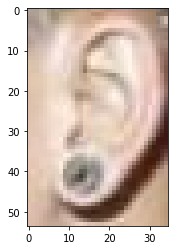

In [6]:
#Appling training path and reading an image
train_path = 'E:\\sem 8\\Datasets\\Wild\\train'
train_image_path = train_path + '\\001.ALI_HD'
train_img = os.listdir(train_image_path)[0]
train_img_path = train_image_path + '\\' + train_img
plt.imshow(imread(train_img_path))

In [7]:
#To check if we need to normalize the input or not
print(imread(train_img_path).max())
print(imread(train_img_path).min())

#need to rescale the image

255
8


(254, 119, 3)

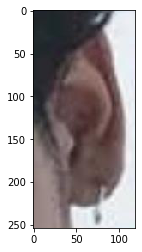

In [8]:
#Appling testing path and reading an image
test_path = 'E:\\sem 8\\Datasets\\Wild\\test'
test_image_path = test_path + '\\001.ALI_HD'
test_img = os.listdir(test_image_path)[0]
test_img_path = test_image_path + '\\' + test_img
plt.imshow(imread(test_img_path))
imread(test_img_path).shape

In [9]:
#To check if we need to normalize the input or not
print(imread(test_img_path).max())
print(imread(test_img_path).min())

#need to rescale the image

254
27


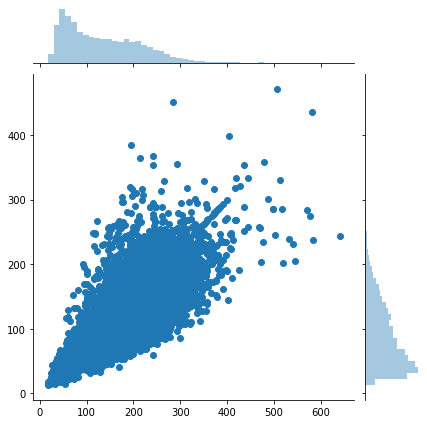

In [9]:
#Checking the dimensions of every images in train dataset
dim1 = []
dim2 = []
train_classes = os.listdir(train_path)
for classes in train_classes:
    for image_filename in os.listdir(train_path+'\\'+ classes):
        imgs = imread(train_path+'\\'+ classes+ '\\' + image_filename)
        d1, d2, colors = imgs.shape
        dim1.append(d1)
        dim2.append(d2)
sns.jointplot(dim1,dim2)

In [10]:
mean_dim1 = np.mean(dim1)
print(mean_dim1)
mean_dim2 = np.mean(dim2)
print(mean_dim2)

131.41198205331222
88.97747866631477


In [12]:
image_shape = (131,88,3)

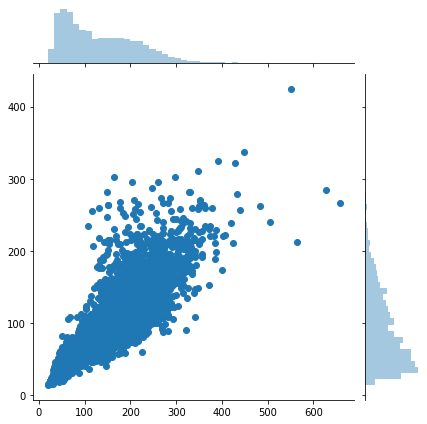

In [12]:
#Checking the dimensions of every images in test dataset
dim1 = []
dim2 = []
test_classes = os.listdir(test_path)
for classes in train_classes:
    for image_filename in os.listdir(test_path+'\\'+ classes):
        imgs = imread(test_path+'\\'+ classes+ '\\' + image_filename)
        d1, d2, colors = imgs.shape
        dim1.append(d1)
        dim2.append(d2)
sns.jointplot(dim1,dim2)

In [13]:
mean_dim1 = np.mean(dim1)
print(mean_dim1)
mean_dim2 = np.mean(dim2)
print(mean_dim2)

131.97728073265233
89.58066220500176


In [10]:
#Creating a data generator for train and validation datasets
import tensorflow as tf
datagen = ImageDataGenerator(
                             fill_mode = 'nearest',
                            rescale = 1/255)

In [13]:
#Creating generators and finding no. of classes and images in train and validation datasets
train_gen = datagen.flow_from_directory(train_path,
                                        target_size = image_shape[:2],
                                        color_mode="rgb",
                                        batch_size = 150,
                                        class_mode = "categorical",
                                        shuffle=True,
                                        )

test_gen = datagen.flow_from_directory(test_path,
                                       target_size = image_shape[:2],
                                       color_mode="rgb",
                                       batch_size = 150,
                                       class_mode = "categorical",
                                       shuffle=False,
                                       )

Found 22734 images belonging to 164 classes.
Found 5678 images belonging to 164 classes.


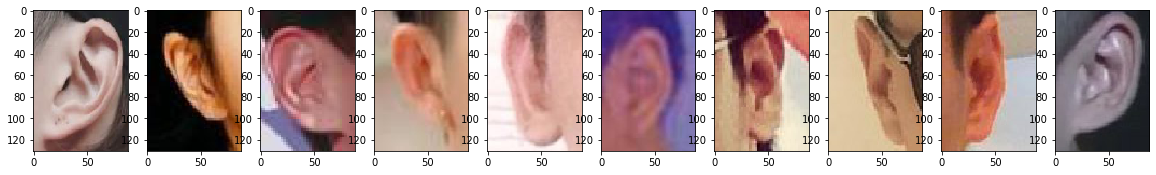

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [14]:
imgs, labels = next(train_gen)
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
    plt.show()
plotImages(imgs)
print(labels)

In [49]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=image_shape))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(164, activation='softmax'))

In [50]:
model.compile(loss = 'categorical_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])

In [51]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 129, 86, 32)       896       
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 64, 43, 32)        0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 62, 41, 64)        18496     
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 60, 39, 64)        36928     
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 30, 19, 64)        0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 28, 17, 128)       73856     
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 14, 8, 128)       

In [52]:
train_gen.class_indices

{'001.ALI_HD': 0,
 '002.LeDuong_BL': 1,
 '003.BD_Tran': 2,
 '004.Binz': 3,
 '005.Bui_AT': 4,
 '006.Chau_GK': 5,
 '007.Chau_KP': 6,
 '008.Chi_D': 7,
 '009.Chi_Th': 8,
 '010.Chu_B': 9,
 '011.Cong_To': 10,
 '012.Dai_Nhan': 11,
 '013.Dam_Vinh_H': 12,
 '014.Dan_Ng': 13,
 '015.Dan_Trg': 14,
 '016.Dang_L': 15,
 '017.Dao_Ba_L': 16,
 '018.De_C': 17,
 '019.Don_Ng': 18,
 '020.Duong_D': 19,
 '021.Dustin_Phuc_Ng': 20,
 '022.Duy_Kh': 21,
 '023.Erik': 22,
 '024.Gin_Tuan_K': 23,
 '025.Ha_Anh_T': 24,
 '026.Hac_Hoa_K': 25,
 '027.Hamtet_Tr': 26,
 '028.Ho_Quang_H': 27,
 '029.Ho_Trung_D': 28,
 '030.Hoai_L': 29,
 '031.Hoang_Rap': 30,
 '032.Huy_Tr': 31,
 '033.Huynh_L': 32,
 '034.Huynh_Ph': 33,
 '035.Isaac': 34,
 '036.Jun_Ph': 35,
 '037.Justatee': 36,
 '038.Kenvin_Kh': 37,
 '039.KhacVi': 38,
 '040.Khuong_Ng': 39,
 '041.Kieu_Minh_T': 40,
 '042.Kim_L': 41,
 '043.L_HA': 42,
 '044.Lam_Canh_T': 43,
 '045.Lam_Hu': 44,
 '046.Lam_Tr': 45,
 '047.Lam_Vinh_H': 46,
 '048.Lee_Jong_S': 47,
 '049.Lee_Min_H': 48,
 '050.Long_

In [53]:
model_fit = model.fit_generator(
            train_gen,
            epochs=40,
            validation_data= test_gen
            )

Epoch 1/40
152/152 [==============================] - 453s 3s/step - loss: 5.0385 - accuracy: 0.0108 - val_loss: 4.7756 - val_accuracy: 0.0194
Epoch 2/40
152/152 [==============================] - 451s 3s/step - loss: 4.7203 - accuracy: 0.0285 - val_loss: 4.4087 - val_accuracy: 0.0548
Epoch 3/40
152/152 [==============================] - 444s 3s/step - loss: 4.2948 - accuracy: 0.0669 - val_loss: 4.0319 - val_accuracy: 0.0979
Epoch 4/40
152/152 [==============================] - 335s 2s/step - loss: 3.8975 - accuracy: 0.1103 - val_loss: 3.6546 - val_accuracy: 0.1497
Epoch 5/40
152/152 [==============================] - 332s 2s/step - loss: 3.4926 - accuracy: 0.1780 - val_loss: 3.4780 - val_accuracy: 0.2099
Epoch 6/40
152/152 [==============================] - 336s 2s/step - loss: 3.0962 - accuracy: 0.2477 - val_loss: 3.2623 - val_accuracy: 0.2594
Epoch 7/40
152/152 [==============================] - 352s 2s/step - loss: 2.7126 - accuracy: 0.3239 - val_loss: 2.9285 - val_accuracy: 0.3110

In [54]:
model.evaluate_generator(test_gen)

[4.988133430480957, 0.42867207527160645]